<a href="https://colab.research.google.com/github/Surya-0804/Nuts-and-Bolts-of-Deep-Learning-Workshop/blob/main/Nuts_and_Bolts_of_DL(phase_II)_Autoencoder_with_Three_Encoder_and_Decoder_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import numpy as np

In [ ]:
# Define transformations for the dataset
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)

# Flatten the images (28x28) into vectors (784,)
def flatten(x):
    return x.view(-1, 28 * 28)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [ ]:
# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 32),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
# Initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop
num_epochs = 5
from tqdm.notebook import tqdm

for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    for inputs, _ in train_loader:
        inputs = flatten(inputs)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5, Loss: 0.24952776076945854
Epoch 2/5, Loss: 0.19275952190794843
Epoch 3/5, Loss: 0.161294993567974
Epoch 4/5, Loss: 0.14758635803740075
Epoch 5/5, Loss: 0.13931568918075968


In [ ]:
# Evaluation loop
model.eval()
with torch.no_grad():
    running_loss = 0.0
    for inputs, _ in test_loader:
        inputs = flatten(inputs)
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        running_loss += loss.item()
    print(f"Validation Loss: {running_loss/len(test_loader)}")

Validation Loss: 0.13498817589133977


In [ ]:

# Get the encoded representations
encoded_representations = []
model.eval()
with torch.no_grad():
    for inputs, _ in train_loader:
        inputs = flatten(inputs)
        encoded = model.encoder(inputs)
        encoded_representations.append(encoded.numpy())

encoded_representations = np.concatenate(encoded_representations, axis=0)
print(encoded_representations.shape)


(60000, 32)


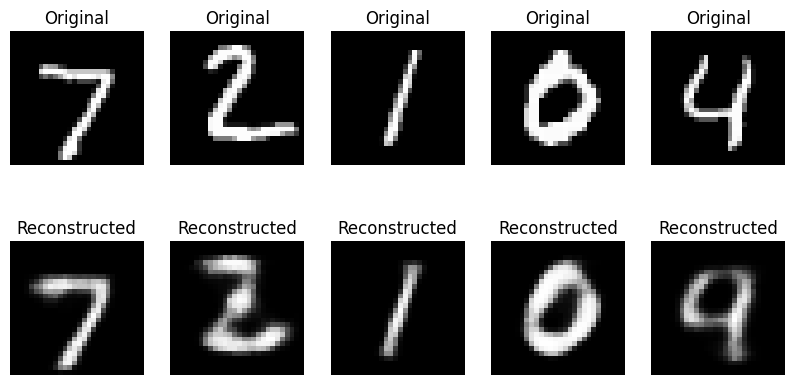

In [ ]:

# Visualize some reconstructed results
import matplotlib.pyplot as plt

def imshow(img, title):
    img = img.view(28, 28).numpy()
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

model.eval()
plt.figure(figsize=(10,5))
with torch.no_grad():
    for i in range(5):
        inputs, _ = test_dataset[i]
        inputs = flatten(inputs.unsqueeze(0))
        outputs = model(inputs)
        plt.subplot(2, 5, i + 1)
        imshow(inputs[0], "Original")
        plt.subplot(2, 5, i + 6)
        imshow(outputs[0], "Reconstructed")
plt.show()